## Load data

In [1]:
# Load packages
## Data wrangling
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt

In [2]:
# Read data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Inspect data

In [3]:
# Inspect first rows of train and test
## Train
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Test
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Shape (rows and columns)
print('train: ',train.shape)
print('test: ',test.shape)

train:  (891, 12)
test:  (418, 11)


In [6]:
# Number of missing values
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Survived
0           549
1           342
dtype: int64
----------------
          female  male
Survived     233   109
dead          81   468


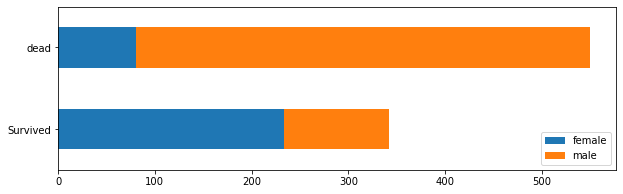

In [7]:
# Visualize distribution of outcome class for one of the categorical features (imbalanced dataset or not?)
## Overall value counts
print(train.loc[:,['Survived']].value_counts())
print('----------------')
## N Survived/Dead per Gender
def bar_plot(feature, figsize=(10,3), legend=True):
    survived = train[train['Survived'] == 1][feature].value_counts()
    dead = train[train['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived,dead],index=['Survived','dead'])
    print(df)
    df.plot(kind='barh',stacked=True, figsize=figsize, legend=legend)

bar_plot('Sex') 

## Preprocessing

#### Convert categorical values to numeric values

In [8]:
# Convert Sex to numeric variable
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

# Convert Embarked to numeric variable
train['Embarked'] = train['Embarked'].map({'S':0,'C':1,'Q':1})
test['Embarked'] = test['Embarked'].map({'S':0,'C':1,'Q':1})

#### Most models don't like missing values. Let's fill them in.

In [9]:
# Age
train['Age'] = train.Age.fillna(np.mean(train.Age))
test['Age'] = test.Age.fillna(np.mean(test.Age))

# Embarked (S = 0 = 'Southampton')
train['Embarked'] = train.Embarked.fillna(0)
test['Embarked']  = test.Embarked.fillna(0)

# Cabin: let's just drop this feature for now
train.drop('Cabin', axis=1, inplace=True)
test.drop('Cabin', axis=1, inplace=True)

In [10]:
# Double check that we have no more missing values
print('Train:')
print(train.isnull().sum())
print('------------------------')
print('Test:')
print(test.isnull().sum())

Train:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
------------------------
Test:
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [11]:
# One more missing value in 'Fare' for test set. Let's fill this one in as well.
train['Fare'] = train.Fare.fillna(np.mean(train.Fare))
test['Fare']  = test.Fare.fillna(np.mean(test.Fare))

#### Only keep Features of interest

In [12]:
# Subset on interesting features
train = train.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]
test = test.loc[:,['PassengerId','Pclass','Sex','Age','SibSp','Parch','Embarked','Fare']]

In [13]:
# Final check
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Fare
0,0,3,0,22.0,1,0,0.0,7.2500
1,1,1,1,38.0,1,0,1.0,71.2833
2,1,3,1,26.0,0,0,0.0,7.9250


## Train Baseline Model

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [15]:
# Seperate our features from our outcome variable
X_full = train.drop('Survived', axis=1)
X_test = test.drop('PassengerId', axis=1)
y_full = train.Survived

In [16]:
# Split our non-test set into a training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, test_size=0.3, random_state=0)

In [17]:
# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=20, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

In [18]:
# Make prediction on our validation dataset
predict = model.predict(X_valid)

In [19]:
# Show our model accuracy
accuracy = metrics.accuracy_score(y_valid, predict)
print('Valid Accuracy: ',accuracy)

Valid Accuracy:  0.8283582089552238


## Create final predictions on test set

In [20]:
# Fit the same model on the full available dataset
model.fit(X_full, y_full)
predict = model.predict(X_test)

In [21]:
# Reformat into dataframe
final_predictions = pd.DataFrame([test.PassengerId, predict]).T
final_predictions.columns = ['PassengerId','Survived']

In [22]:
final_predictions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [23]:
# Save as csv
final_predictions.to_csv('final_predictions.csv',index=False)